In [1]:
import requests
import csv
import re

## GET RAW TEXT ##
#raw_text = requests.get("https://www.briansolis.com/2009/10/revealing-the-people-defining-social-networks/", headers={'User-Agent': 'anything, who cares'}).text
raw_text = open('raw_text').read()
lines = raw_text.splitlines()

## GET CATEGORIES ##
sites = [l.split('logo')[0].split('/')[-1][:-1].lower() for l in lines if '2009/10' in l and 'logo' in l and not 'script' in l]
sites.append('youtube')

## GET DATA OF INTEREST ##
# default value: '-'
visitors_us = ['-']*len(sites)
visitors_world = ['-']*len(sites)
visits_us = ['-']*len(sites)
visits_world = ['-']*len(sites)
edu_categs = ['no college','college', 'grad. school']
education = {categ: ['-']*len(sites) for categ in edu_categs }
no_children = ['-']*len(sites)

def engineeringNotation2int(num):
    if num[-1]=="B": return int(float(num[:-1])*1000000000)
    if num[-1]=="M": return int(float(num[:-1])*1000000)
    if num[-1]=="K": return int((float(num[:-1])*1000))

def percent(html_line):
    line = re.sub(re.compile('<.*?>'), '', html_line)
    return int(line.split()[-1][:-1])

i=-1

for n,l in enumerate(lines):
    if 'Visitors' in l:
        i+=1
        l = l.replace("&#8211;","") # bad char                                                                                                                                               
        line_visitors = [ engineeringNotation2int(word) for word in re.findall("\d+\.*\d*\ ?\w", l) ]                                                                                        
        if len(line_visitors)==2:                                                                                                                                                            
            visitors_us[i] =  line_visitors[0]                                                                                                                                               
            visitors_world[i] = line_visitors[1]                                                                                                                                             
        else:                                                                                                                                                                                
            visitors_world[i] = line_visitors[0]
    elif 'total visits' in l.lower():
        line_visits = [ engineeringNotation2int(word) for word in re.findall("\d+\.*\d*\ ?\w", l) ]
        if len(line_visits)==2:
            visits_us[i] = line_visits[0]
            visits_world[i] = line_visits[1]
        else:
            visits_world[i] = line_visits[0]
    elif 'Education' in l:
        if 'no college' in lines[n+1].lower():
            a,b,c = [lines[n+x] for x in range(1,4)]
            education['no college'][i] = percent(a)
            education['college'][i] = percent(b)
            education['grad. school'][i] = percent(c)
        elif 'less than hs diploma' in lines[n+1].lower():
            a,b,c,d,e = [lines[n+x] for x in range(1,6)]
            education['no college'][i] = percent(a) + percent(b)
            education['college'][i] = percent(c) + percent(d)
            education['grad. school'][i] = percent(e)
    elif 'Children in Household' in l:
        no = lines[n+2]
        no_children[i] = percent(no)

with open("data.csv","w") as f:
    writer = csv.writer(f, lineterminator="\n")
    writer.writerow(sites)
    writer.writerow(visitors_us)
    writer.writerow(visitors_world)
    writer.writerow(visits_us)
    writer.writerow(visits_world)
    for categ in education: writer.writerow(education[categ])
    writer.writerow(no_children)

In [2]:
import os
os.system("./pivote_and_sortbycol.sh 3 > data_pivoted.csv")

0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("data_pivoted.csv")

In [5]:
data.style.hide_index()

Red social,Visitantes (EEUU),Visitantes (Mundo),Visitas (EEUU),Visitas (Mundo),Nivel Educ. Bajo,Nivel Educ. Medio,Nivel. Educ Alto,Sin hijos
facebook,110000000,370000000,3100000000,8700000000,36,56,8,64
myspace,61000000,120000000,1200000000,1500000000,44,52,4,43
youtube,-,78000000,-,459000000,48,39,13,57
flickr,19000000,73000000,94000000,280000000,27,64,9,72
twitter,24000000,66000000,270000000,550000000,21,71,8,72
linkedin,14000000,31000000,85000000,160000000,13,71,16,90
scribd,4200000,23000000,10000000,51000000,23,65,13,79
digg,9000000,23000000,53000000,98000000,25,66,9,78
ning,5600000,18000000,28000000,74000000,27,66,7,64
yelp,9700000,11000000,33000000,35000000,18,67,14,85


# ¿Qué redes sociales son más grandes?

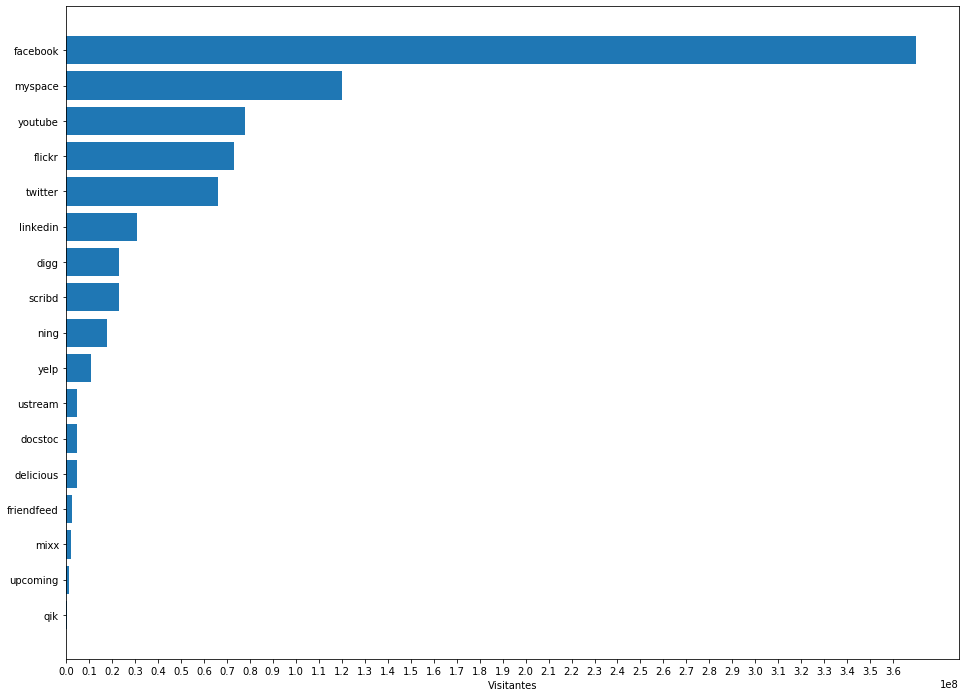

In [6]:
barh_data = data.to_dict('Red social')


plt.barh( data.sort_values("Visitantes (Mundo)", ascending=True)["Red social"],
         data["Visitantes (Mundo)"].sort_values(ascending=True),
        figure = plt.figure(figsize= [6.4*2.5, 4.8*2.5]))
plt.xticks(np.arange(0, max(data["Visitantes (Mundo)"]), 10000000))

plt.xlabel("Visitantes")
plt.show()


# ¿Qué tipo de gente hay en cada red social?

![](tablas_tipo_gente.png)

In [7]:
#TODO: reproducir estas tablas programáticamente

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>